<a href="https://www.kaggle.com/code/saurabhbelsare13/eda-using-python?scriptVersionId=163691548" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Exploratory data analysis using python(pandas, seaborn, matplotlib)


## Introduction
<span style="font-size:20px;">Exploratory data analysis (EDA) is a crucial step in the data analysis process where we aim to understand the data, discover patterns, spot anomalies, and formulate hypotheses. By visually exploring the data, we gain insights that can guide further analysis and decision-making.</span>

<span style="font-size:20px;">In this notebook, we'll perform EDA on the Olympics dataset. The dataset contains 15 columns, including:</br>
    **ID:** Unique identifier for each athlete.</br>
    **Name:** Name of the athlete.</br>
    **Sex:** Gender of the athlete.</br>
    **Age:** Age of the ahtlete.</br>
    **Height:** Height of the athlete(in centimeters).</br>
    **Weight:** Weight of the athlete(in kilograms).</br>
    **Team:** Team the athlete represents.</br>
    **NOC:** National Olympic Committee code.</br>
    **Games:** Year and Season of the Olympic Games.</br>
    **Year:** Year of the Olympic Games.</br>
    **Season:** Season of the Olympic Games (Summer or Winter).</br>
    **City:**  Host city of the Olympic Games.</br>
    **Sport:** Sport in which the athlete competes.</br>
    **Event:** Event in which the athlete participates.</br>
    **Medal:** Medal won by the athlete (Gold, Silver, Bronze).</span>


<span style="font-size:20px;"> By conducting EDA, I'm going to uncover interesting trends, relationships, and insights within the data. Let's dive in! </span>

## Importing useful libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Take a look at dataset

In [2]:
# Reading the dataset
data = pd.read_csv("/kaggle/input/olympic-data/dataset_olympics.csv")


In [3]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [4]:
# To know more about dataset
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      70000 non-null  int64  
 1   Name    70000 non-null  object 
 2   Sex     70000 non-null  object 
 3   Age     67268 non-null  float64
 4   Height  53746 non-null  float64
 5   Weight  52899 non-null  float64
 6   Team    70000 non-null  object 
 7   NOC     70000 non-null  object 
 8   Games   70000 non-null  object 
 9   Year    70000 non-null  int64  
 10  Season  70000 non-null  object 
 11  City    70000 non-null  object 
 12  Sport   70000 non-null  object 
 13  Event   70000 non-null  object 
 14  Medal   9690 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 8.0+ MB


In [5]:
data.describe(include =["object"])

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,70000,70000,70000,70000,70000,70000,70000,70000,70000,9690
unique,35556,2,827,226,51,2,42,65,744,3
top,Oksana Aleksandrovna Chusovitina,M,United States,USA,2016 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,29,51877,4979,5216,3675,58467,6034,10629,1738,3292


## Checking for missing values

In [6]:
# checking for missing values in the dataset
data.isna().sum()

ID            0
Name          0
Sex           0
Age        2732
Height    16254
Weight    17101
Team          0
NOC           0
Games         0
Year          0
Season        0
City          0
Sport         0
Event         0
Medal     60310
dtype: int64

## Removing duplicates

In [7]:
# Checking for duplicate values
data.duplicated().sum()


383

In [8]:
# Cleaning or droping duplicate values
data.drop_duplicates(inplace = True)

data.duplicated().sum()

0

## Visualization makes it easy understand data.
<span style="font-size:20px;"> Using the power of **Seaborn** and **Matplotlib** let's try to plot some graphs.</span>


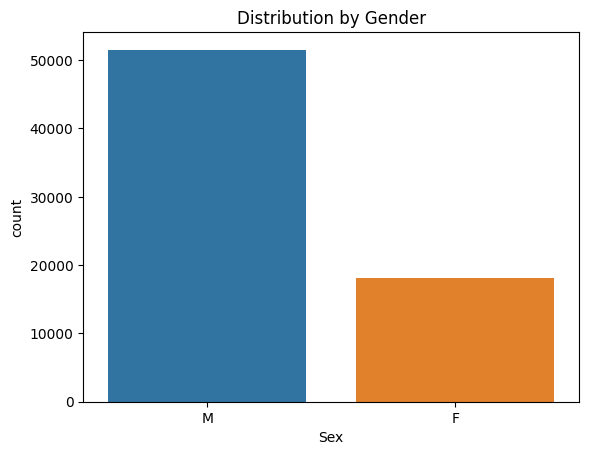

In [9]:
# Gender distribution
sns.countplot(data = data, x = "Sex")
plt.title("Distribution by Gender")
plt.show()

<span style="font-size:20px;"> **Hist Plot:** Shows the distribution of the sample data. </span>

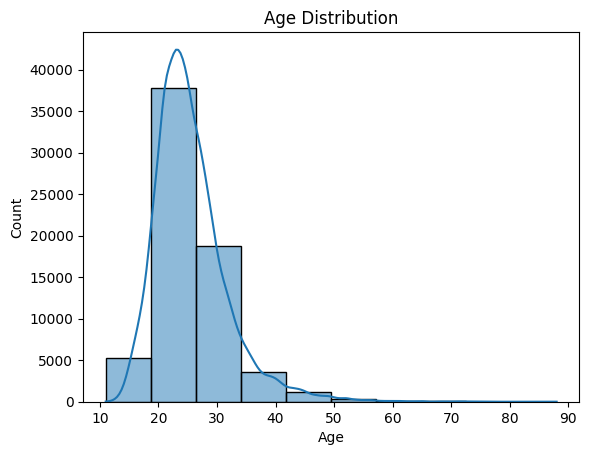

In [10]:
# Age Distribution
sns.histplot( data = data, x = "Age", bins = 10, kde = True)
plt.title("Age Distribution")
plt.show()

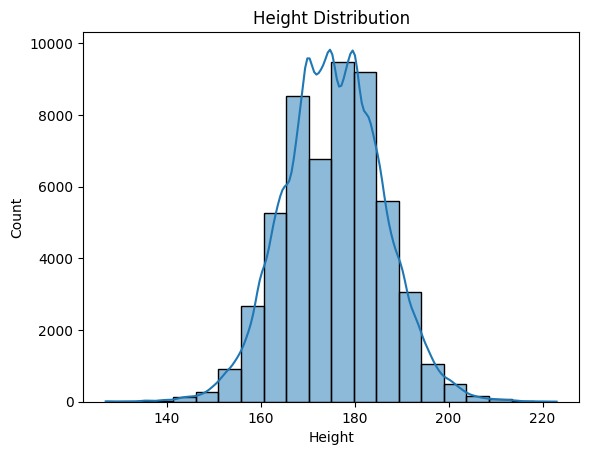

In [11]:
# Height Distribution
sns.histplot( data = data, x = "Height", bins = 20, kde = True )
plt.title("Height Distribution")
plt.show()

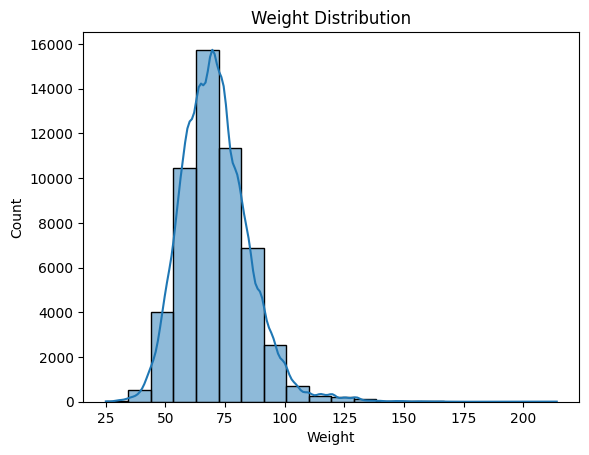

In [12]:
# Weight Distribution
sns.histplot( data = data, x = "Weight", bins = 20, kde = True)
plt.title("Weight Distribution")
plt.show()

<span style="font-size:20px;"> **Bar Chart:** Plots rectangular bars to represent the count/sum/average of a categorical variable. </span>

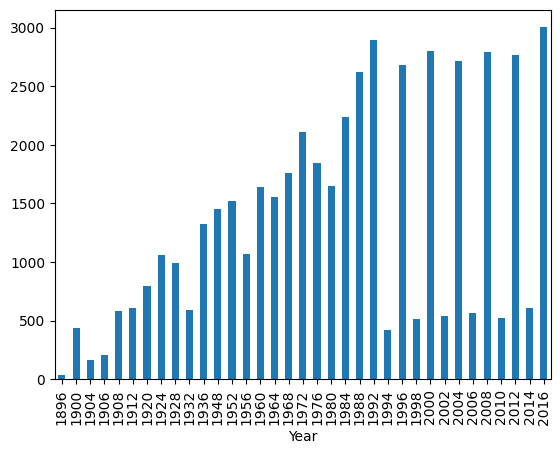

In [13]:
# Number of participants per year
year_participants_count = data.groupby("Year")["ID"].nunique()
year_participants_count.plot(kind = 'bar')
plt.show()

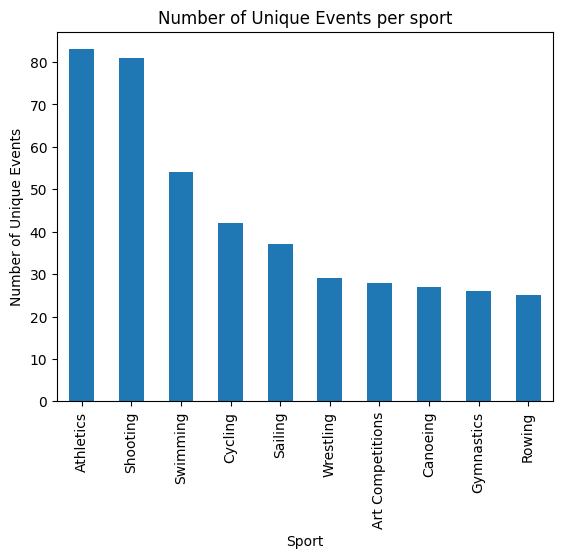

In [14]:
# Number of unique events per sport
country_event_count = data.groupby(["Sport"])["Event"].nunique().sort_values(ascending = False).iloc[:10]
country_event_count.plot(kind = 'bar')
plt.title("Number of Unique Events per sport")
plt.xlabel("Sport")
plt.ylabel("Number of Unique Events")
plt.show()



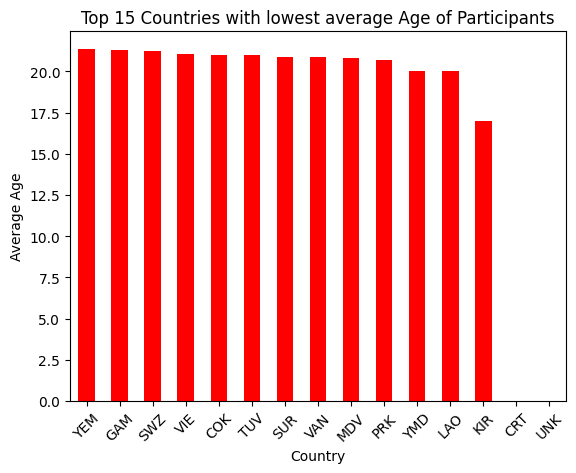

In [15]:
# Avg. age by country
avg_age_by_country = data.groupby("NOC")["Age"].mean().sort_values(ascending = False)
avg_age_by_country.tail(15).plot(kind = "bar",color = "red")
plt.title("Top 15 Countries with lowest average Age of Participants")
plt.xlabel("Country")
plt.ylabel("Average Age")
plt.xticks(rotation = 45)
plt.show()

<span style="font-size:20px;">**Box Plot:**  Draws a box to show the distribution of categorical data.</span>

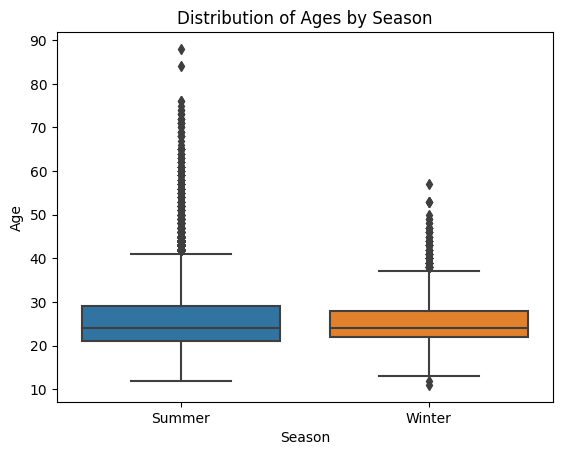

In [16]:
# Distribution of Ages of Season
sns.boxplot( data = data, x = "Season", y = "Age")
plt.title("Distribution of Ages by Season")
plt.xlabel("Season")
plt.ylabel("Age")
plt.show()

<span style="font-size:20px;">**Violin Plot:** Draws a combination of boxplot and kernel density estimation(kde) for showing the distribution of numeric data across many levels of one (or more) categorical variables.</span>

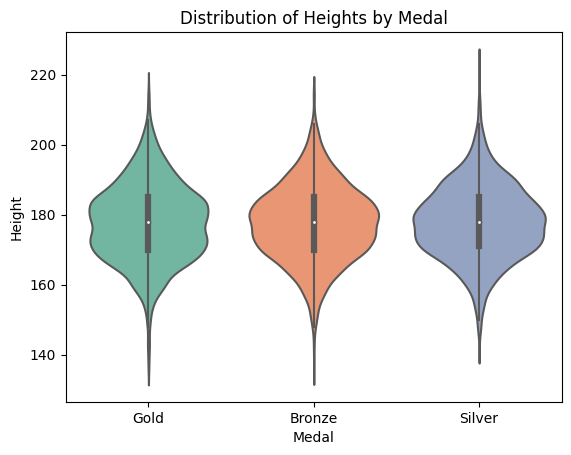

In [17]:
# Distribution of heights by medals
sns.violinplot(data = data, x = "Medal", y = "Height", palette = "Set2")
plt.title("Distribution of Heights by Medal")
plt.xlabel("Medal")
plt.ylabel("Height")
plt.show()

<span style="font-size:20px;">**Scatter Plot:** Used to show the relationship between two numerical variables.</span>

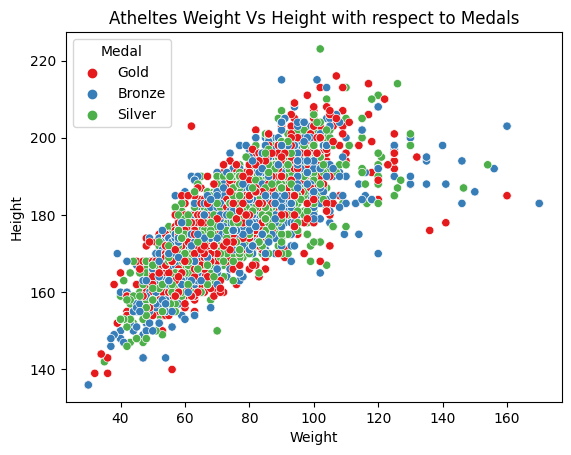

In [18]:
# Relation between the Height and Weight of Athlete with respect to Medals.
sns.scatterplot(data = data , x = "Weight", y = "Height", hue = "Medal", palette="Set1")
plt.title("Atheltes Weight Vs Height with respect to Medals")
plt.xlabel("Weight")
plt.ylabel("Height")
plt.show()

<span style="font-size:20px;">**Heatmap:** Plots rectangular data as a color-encoded matrix, useful for visualizing two-dimensional data (like a correlation matrix).</span>

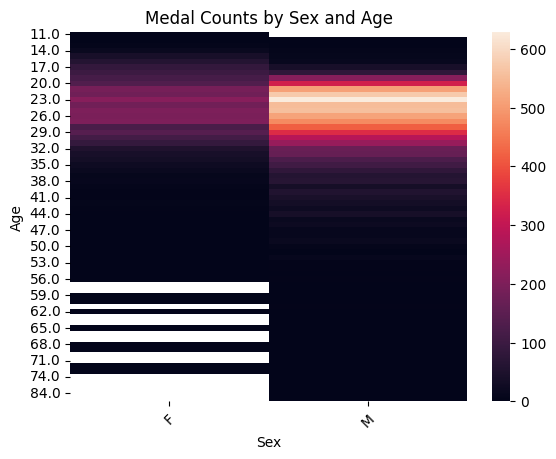

In [19]:
# Medals count by Age and Sex
medals_by_age_sex = data.pivot_table(index = "Age", columns = "Sex", values = "Medal", aggfunc = "count")
sns.heatmap(medals_by_age_sex)
plt.title("Medal Counts by Sex and Age")
plt.xlabel("Sex")
plt.ylabel("Age")
plt.xticks(rotation = 45)
plt.show()

## Now, Let's find out:
<span style="font-size:20px;">Avg. Height, Weight of Athlete(male & female).</br>
 Max. Height, Weight of Athlete(male & female).</br>
 Nu. of Athletes(male & female) by country.</br>
 Max. of Medals by country.</span>


In [20]:
# Avg. age of participants
avg_age_by_year = data.groupby("Year")["Age"].mean()
print(avg_age_by_year)

Year
1896    23.029412
1900    29.119883
1904    27.063241
1906    26.989474
1908    27.000000
1912    27.965552
1920    29.241135
1924    28.252267
1928    27.973564
1932    29.606987
1936    27.245665
1948    28.363170
1952    26.273684
1956    26.316156
1960    25.136156
1964    24.852107
1968    24.316722
1972    24.126448
1976    23.656820
1980    23.312364
1984    24.060328
1988    24.257374
1992    24.637827
1994    24.487516
1996    25.338210
1998    25.143860
2000    25.435177
2002    26.029095
2004    25.780111
2006    26.091716
2008    25.685148
2010    26.150776
2012    25.993485
2014    26.082814
2016    26.259592
Name: Age, dtype: float64


In [21]:
# Avg. Height of Athletes
sport_median_height = data.groupby("Sport")["Height"].median()
# Max. height among the Athletes
print(sport_median_height.max())

190.0


In [22]:
# Max. height of Athlete belongs to which sport category.
sport_median_height[sport_median_height == 190.0]

Sport
Basketball    190.0
Name: Height, dtype: float64

In [23]:
# Number of male and female Athletes by country.
country_gender_count = data.groupby(["NOC", "Sex"])["ID"].count()
print(country_gender_count)

NOC  Sex
AFG  M       38
AHO  F        6
     M       27
ALB  F        4
     M        7
           ... 
YUG  M      455
ZAM  F        3
     M       40
ZIM  F       41
     M       47
Name: ID, Length: 432, dtype: int64


In [24]:
# Country with most gold medals.
country_gold_medals = data[data["Medal"] == "Gold"].groupby("NOC")["Medal"].count()
print(country_gold_medals.max())

747


In [25]:
# Avg. weight of male and female Athletes.
sport_gender_avg_weight = data.groupby(["Sport","Sex"])["Weight"].mean()
sport_gender_avg_weight["Swimming"]["M"]

77.09726386806597

In [26]:
country_gold_medals[country_gold_medals == 747]

NOC
USA    747
Name: Medal, dtype: int64

In [27]:
# Most medal winning Country
most_medals_by_country = data["NOC"].value_counts().idxmax()
print("Most medal winning country is:", most_medals_by_country)

Most medal winning country is: USA


In [28]:
# Tallest Athlete
tallest_athlete = data[data["Height"] == data["Height"].max()]
print("Tallest Athlete:")
print(tallest_athlete[["ID","Name","Height","Sport","NOC"]])

Tallest Athlete:
          ID                  Name  Height       Sport  NOC
32376  16639  Tommy Loren Burleson   223.0  Basketball  USA


In [29]:
# Heaviest Athlete
heaviest_athlete = data[data["Weight"] == data["Weight"].max()]
print("Heaviest Athlete:")
print(heaviest_athlete[["ID","Name","Weight","Sport","NOC"]])


Heaviest Athlete:
          ID               Name  Weight Sport  NOC
23155  12177  Ricardo Blas, Jr.   214.0  Judo  GUM
23156  12177  Ricardo Blas, Jr.   214.0  Judo  GUM
